<a href="https://colab.research.google.com/github/NguyenKimLong-20146222/AI-sang-thu-7/blob/main/AI_W9_31_03_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import mnist

In [2]:
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_labels.shape

(60000,)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
test_labels.shape

(10000,)

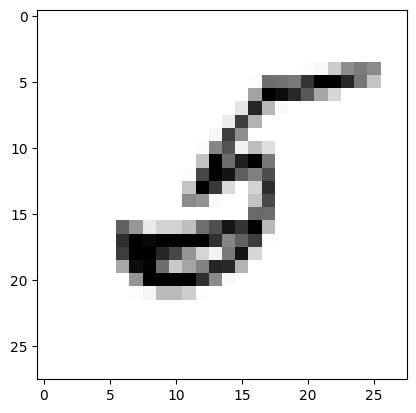

Số: 5


In [7]:
digit=train_images[1111]
import matplotlib.pyplot as plt
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()
print('Số:',train_labels[1111])

<ipython-input-8-23d9cd638420>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,5,i+1)


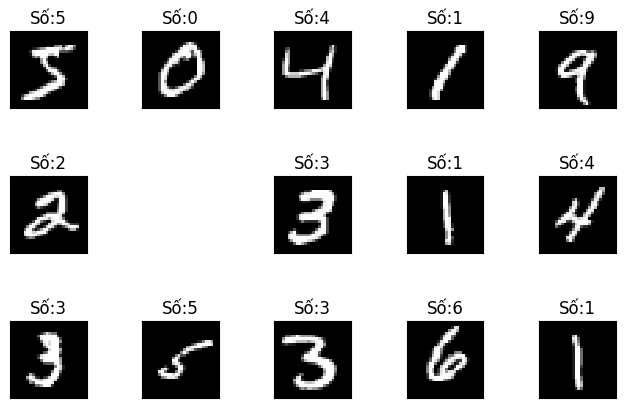

In [8]:
for i in range(15):
   plt.subplot(3,5,i+1)
   plt.tight_layout()
   plt.imshow(train_images[i],cmap='gray',interpolation='none')
   plt.title('Số:{}'.format(train_labels[i]))
   plt.xticks([])
   plt.yticks([])


In [9]:
from keras.models import Sequential
from keras.layers import Dense
model=Sequential()
model.add(Dense(512,activation='relu',input_shape=(28*28,)))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [10]:
x=test_images
y=test_labels

In [11]:
train_images=train_images.reshape(60000,28*28)
train_images=train_images.astype('float32')/255
test_images=test_images.reshape(10000,28*28)
test_images=test_images.astype('float32')/255

In [ ]:
from keras.utils import to_categorical
train_labels=to_categorical(train_labels,10)
test_labels=to_categorical(test_labels,10)

In [ ]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_images,train_labels,epochs=10,batch_size=128)
test_loss,test_acc=model.evaluate(test_images,test_labels)
print('Mất mát:',test_loss)
print('Độ chính xác:',test_acc)

Epoch 1/10
469/469 [==============================] - 6s 12ms/step - loss: 0.2670 - accuracy: 0.9240
Epoch 2/10
469/469 [==============================] - 5s 11ms/step - loss: 0.1063 - accuracy: 0.9683
Epoch 3/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0698 - accuracy: 0.9795
Epoch 4/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0508 - accuracy: 0.9848
Epoch 5/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0371 - accuracy: 0.9890
Epoch 6/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0281 - accuracy: 0.9918
Epoch 7/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0221 - accuracy: 0.9934
Epoch 8/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0163 - accuracy: 0.9954
Epoch 9/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0120 - accuracy: 0.9969
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0.0596 - accurac

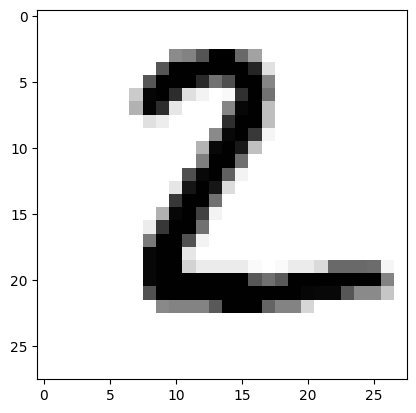

Số: 2


In [ ]:
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()
digit=test_images[1]
import matplotlib.pyplot as plt
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()
print('Số:',test_labels[1])

In [12]:
x_pred=x[1].reshape(1,28*28)
x_pred=x_pred.astype('float32')/255
y_pred=model.predict(x_pred)
print(y_pred)

1/1 [==============================] - 0s 125ms/step
[[0.10481983 0.06056218 0.0903134  0.074565   0.1281739  0.14070876
  0.13465044 0.09172892 0.06600174 0.1084758 ]]


In [13]:
import numpy as np
np.argmax(model.predict(x_pred),axis=1)

1/1 [==============================] - 0s 17ms/step


array([5])

In [14]:
x_pred = x[600].reshape(1,28*28)
x_pred = x_pred.astype('float32')/255
y_pred = model.predict(x_pred)
np.argmax(model.predict(x_pred),axis=1)

1/1 [==============================] - 0s 17ms/step


array([2])